# Data Science Aplicada à Área de Saúde

Projeto de análise de dados da formação FIAMED da [DSA](https://www.datascienceacademy.com.br/)

## Previsão de Ocorrência de Óbitos Relacionados à  Hepatite

A hepatite é a inflamação do fígado. Pode ser causada por vírus ou pelo uso de alguns remédios, álcool e outras drogas, assim como por doenças autoimunes, metabólicas e genéticas. Em alguns casos, são doenças silenciosas que nem sempre apresentam sintomas.

As hepatites virais são inflamações causadas por vírus que são classificados por letras do alfabeto em A, B, C, D (Delta) e E. No Brasil, mais de 70% (23.070) dos óbitos por hepatites virais são decorrentes da Hepatite C, seguido da Hepatite B (21,8%) e A (1,7%). O país registrou 40.198 casos novos de hepatites virais em 2017.  

__Dataset__

https://archive.ics.uci.edu/ml/datasets/hepatitis

## Carregando os Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Título das colunas
nome_colunas = ['Class', 'Age','Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig',
                'LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','SGOT',
                'Albumin','Protime','Histology']

In [3]:
# Carrega os dados
dados_hepatite = pd.read_csv('dados/dataset-data-munging-02-hepatite.data', 
                             names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')

In [4]:
dados_hepatite.head(10)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [5]:
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Gender          155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

## Inspecionando a variável target

Transformando 

* DIE: 1 = 0
* LIVE: 2 = 1

In [6]:
dados_hepatite['Class'] = dados_hepatite['Class'].replace(1, 0)
dados_hepatite['Class'] = dados_hepatite['Class'].replace(2, 1)

In [7]:
print('Sobreviventes = 1')
print(f'Freq: {dados_hepatite.Class.sum()}\tProp: {dados_hepatite.Class.mean():.2f}')
print('\nNão Sobreviventes = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Class.sum()}\tProp: {(1-dados_hepatite.Class.mean()):.2f}')

Sobreviventes = 1
Freq: 123	Prop: 0.79

Não Sobreviventes = 0
Freq: 32	Prop: 0.21


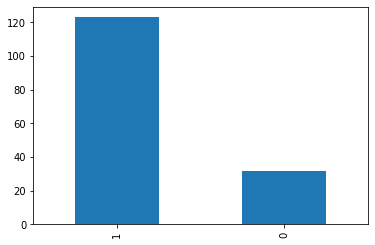

In [8]:
# Visualizar balanceamento
dados_hepatite['Class'].value_counts().plot(kind='bar');

## Limpeza e análise exploratória de dados

In [9]:
# Replace '?' com valores NA
dados_hepatite = dados_hepatite.replace('?', np.nan)

In [10]:
# Visualizar as primeiras linhas
dados_hepatite.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,1,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,1,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,1,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [11]:
# Porcentagem de valores missing
1-(dados_hepatite.count() / dados_hepatite.shape[0]).round(2)

Class             0.00
Age               0.00
Gender            0.00
Steroid           0.01
Antivirals        0.00
Fatigue           0.01
Malaise           0.01
Anorexia          0.01
LiverBig          0.06
LiverFirm         0.07
SpleenPalpable    0.03
Spiders           0.03
Ascites           0.03
Varices           0.03
Bilirubin         0.04
AlkPhosphate      0.19
SGOT              0.03
Albumin           0.10
Protime           0.43
Histology         0.00
dtype: float64

Criar uma função para imputar a mediana

### Imputação de mediana para valores numéricos 

In [12]:
# Função para o Replace das linhas vazias
def impute_median(series):
    return series.fillna(series.median())

# Agrupar por classes
by_class = dados_hepatite.groupby(['Class'])

Bilirubin

In [13]:
# Transformação para variável numérica contínua
dados_hepatite['Bilirubin'] = dados_hepatite['Bilirubin'].astype('float32')

In [14]:
# Estatísticas da feature
dados_hepatite['Bilirubin'].describe()

count    149.000000
mean       1.427516
std        1.212149
min        0.300000
25%        0.700000
50%        1.000000
75%        1.500000
max        8.000000
Name: Bilirubin, dtype: float64

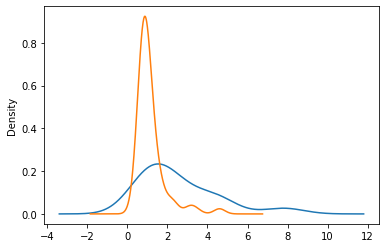

In [15]:
# Visualização da distribuição em relação ao target
by_class['Bilirubin'].plot(kind='density');

In [16]:
# Mediana em relação ao target
by_class['Bilirubin'].median()

Class
0    1.95
1    1.00
Name: Bilirubin, dtype: float32

In [17]:
# Imputação da mediana em relação ao target
dados_hepatite.Bilirubin = dados_hepatite['Bilirubin'].transform(impute_median)

AlkPhosphate

In [18]:
# Transformação para variável numérica contínua
dados_hepatite['AlkPhosphate'] = dados_hepatite['AlkPhosphate'].astype('float32')

In [19]:
# Estatísticas da feature
dados_hepatite['AlkPhosphate'].describe()

count    126.000000
mean     105.325394
std       51.508114
min       26.000000
25%       74.250000
50%       85.000000
75%      132.250000
max      295.000000
Name: AlkPhosphate, dtype: float64

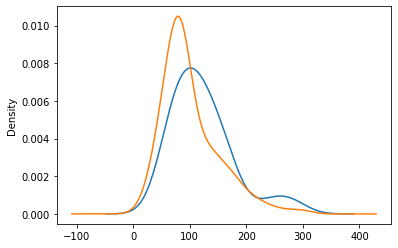

In [20]:
# Visualização da distribuição em relação ao target
by_class['AlkPhosphate'].plot(kind='density');

In [21]:
# Mediana em relação ao target
by_class['AlkPhosphate'].median()

Class
0    113.5
1     85.0
Name: AlkPhosphate, dtype: float32

In [22]:
# Imputação da mediana em relação ao target
dados_hepatite.AlkPhosphate = by_class['AlkPhosphate'].transform(impute_median)

SGOT

In [23]:
# Transformação para variável numérica contínua
dados_hepatite['SGOT'] = dados_hepatite['SGOT'].astype('float32')

In [24]:
# Estatísticas da feature
dados_hepatite['SGOT'].describe()

count    151.000000
mean      85.894043
std       89.650887
min       14.000000
25%       31.500000
50%       58.000000
75%      100.500000
max      648.000000
Name: SGOT, dtype: float64

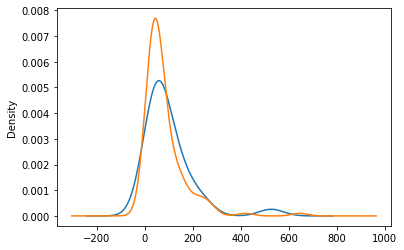

In [25]:
# Visualização da distribuição em relação ao target
by_class['SGOT'].plot(kind='density');

In [26]:
# Mediana em relação ao target
by_class['SGOT'].median()

Class
0    66.0
1    55.0
Name: SGOT, dtype: float32

In [27]:
# Imputação da mediana em relação ao target
dados_hepatite.SGOT = dados_hepatite['SGOT'].transform(impute_median)

Albumin

In [28]:
# Transformação para variável numérica contínua
dados_hepatite['Albumin'] = dados_hepatite['Albumin'].astype('float32')

In [29]:
# Estatísticas da feature
dados_hepatite['Albumin'].describe()

count    139.000000
mean       3.817265
std        0.651523
min        2.100000
25%        3.400000
50%        4.000000
75%        4.200000
max        6.400000
Name: Albumin, dtype: float64

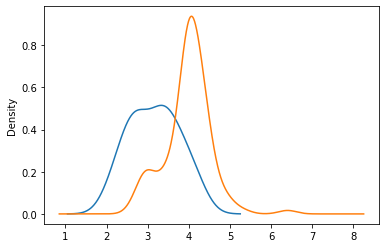

In [30]:
# Visualização da distribuição em relação ao target
by_class['Albumin'].plot(kind='density');

In [31]:
# Mediana em relação ao target
by_class['Albumin'].median()

Class
0    3.3
1    4.0
Name: Albumin, dtype: float32

In [32]:
# Imputação da mediana em relação ao target
dados_hepatite.Albumin = by_class['Albumin'].transform(impute_median)

Protime

In [33]:
# Transformação para variável numérica contínua
dados_hepatite['Protime'] = dados_hepatite['Protime'].astype('float32')

In [34]:
# Estatísticas da feature
dados_hepatite['Protime'].describe()

count     88.000000
mean      61.852272
std       22.875242
min        0.000000
25%       46.000000
50%       61.000000
75%       76.250000
max      100.000000
Name: Protime, dtype: float64

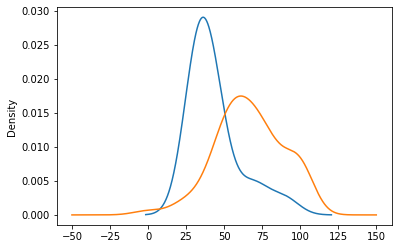

In [35]:
# Visualização da distribuição em relação ao target
by_class['Protime'].plot(kind='density');

In [36]:
# Mediana em relação ao target
by_class['Protime'].median()

Class
0    39.0
1    66.0
Name: Protime, dtype: float32

In [37]:
# Imputação da mediana em relação ao target
dados_hepatite.Protime = by_class['Protime'].transform(impute_median)

### Imputação de mediana para valores dicotômicos

__Gender__

Transformando 

* Male: 1 = 0
* Female: 2 = 1

In [38]:
# Recategorizar dados
dados_hepatite['Gender'] = dados_hepatite['Gender'].replace(1, 0)
dados_hepatite['Gender'] = dados_hepatite['Gender'].replace(2, 1)

In [39]:
print('Mulheres = 1')
print(f'Freq: {dados_hepatite.Gender.sum()}\tProp: {dados_hepatite.Gender.mean():.2f}')
print('\nHomens = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Gender.sum()}\tProp: {(1-dados_hepatite.Gender.mean()):.2f}')

Mulheres = 1
Freq: 16	Prop: 0.10

Homens = 0
Freq: 139	Prop: 0.90


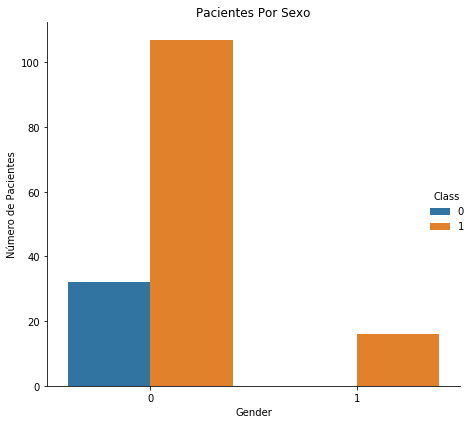

In [40]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Gender', hue = 'Class', data = dados_hepatite, kind = 'count', height = 6)
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Sexo')
plt.tight_layout()

In [41]:
# Visualizar missing
dados_hepatite['Gender'].isnull().sum()

0

__Steroid__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [42]:
# Recategorizar dados
dados_hepatite['Steroid'] = dados_hepatite['Steroid'].replace('1', '0')
dados_hepatite['Steroid'] = dados_hepatite['Steroid'].replace('2', '1')

In [43]:
# Visualizar missing
dados_hepatite['Steroid'].isnull().sum()

1

In [44]:
# Imputação da mediana em relação ao target
dados_hepatite['Steroid'] = dados_hepatite['Steroid'].fillna(dados_hepatite['Steroid'].median())

In [45]:
# Transformar valor para numérico inteiro
dados_hepatite['Steroid'] = dados_hepatite['Steroid'].astype('int')

In [46]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Steroid.sum()}\tProp: {dados_hepatite.Steroid.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Steroid.sum()}\tProp: {(1-dados_hepatite.Steroid.mean()):.2f}')

Yes = 1
Freq: 79	Prop: 0.51

No = 0
Freq: 76	Prop: 0.49


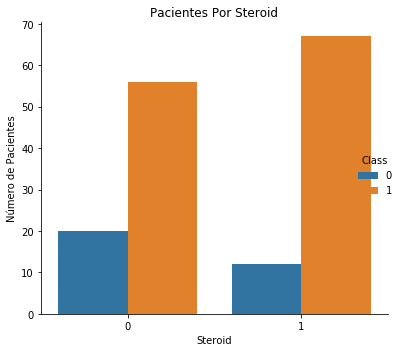

In [47]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Steroid', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Steroid')
plt.tight_layout()

__Antivirals__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [48]:
# Recategorizar dados
dados_hepatite['Antivirals'] = dados_hepatite['Antivirals'].replace(1, 0)
dados_hepatite['Antivirals'] = dados_hepatite['Antivirals'].replace(2, 1)

In [49]:
# Visualizar missing
dados_hepatite['Antivirals'].isnull().sum()

0

In [50]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Antivirals.sum()}\tProp: {dados_hepatite.Antivirals.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Antivirals.sum()}\tProp: {(1-dados_hepatite.Antivirals.mean()):.2f}')

Yes = 1
Freq: 131	Prop: 0.85

No = 0
Freq: 24	Prop: 0.15


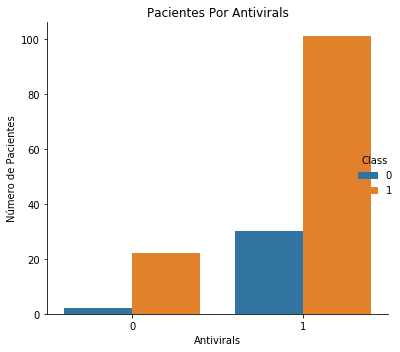

In [51]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Antivirals', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Antivirals')
plt.tight_layout()

__Fatigue__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [52]:
# Recategorizar dados
dados_hepatite['Fatigue'] = dados_hepatite['Fatigue'].replace('1', '0')
dados_hepatite['Fatigue'] = dados_hepatite['Fatigue'].replace('2', '1')

In [53]:
# Visualizar missing
dados_hepatite['Fatigue'].isnull().sum()

1

In [54]:
# Imputação da mediana em relação ao target
dados_hepatite['Fatigue'] = dados_hepatite['Fatigue'].fillna(dados_hepatite['Fatigue'].median())

In [55]:
dados_hepatite['Fatigue'] = dados_hepatite['Fatigue'].astype('int')

In [56]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Fatigue.sum()}\tProp: {dados_hepatite.Fatigue.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Fatigue.sum()}\tProp: {(1-dados_hepatite.Fatigue.mean()):.2f}')

Yes = 1
Freq: 54	Prop: 0.35

No = 0
Freq: 101	Prop: 0.65


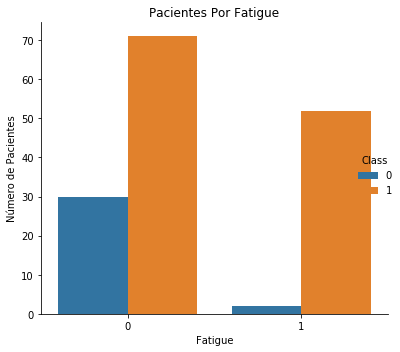

In [57]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Fatigue', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Fatigue')
plt.tight_layout()

__Malaise__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [58]:
# Recategorizar dados
dados_hepatite['Malaise'] = dados_hepatite['Malaise'].replace('1', '0')
dados_hepatite['Malaise'] = dados_hepatite['Malaise'].replace('2', '1')

In [59]:
# Visualizar missing
dados_hepatite['Malaise'].isnull().sum()

1

In [60]:
# Imputação da mediana em relação ao target
dados_hepatite['Malaise'] = dados_hepatite['Malaise'].fillna(dados_hepatite['Malaise'].median())

In [61]:
dados_hepatite['Malaise'] = dados_hepatite['Malaise'].astype('int')

In [62]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Malaise.sum()}\tProp: {dados_hepatite.Malaise.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Malaise.sum()}\tProp: {(1-dados_hepatite.Malaise.mean()):.2f}')

Yes = 1
Freq: 94	Prop: 0.61

No = 0
Freq: 61	Prop: 0.39


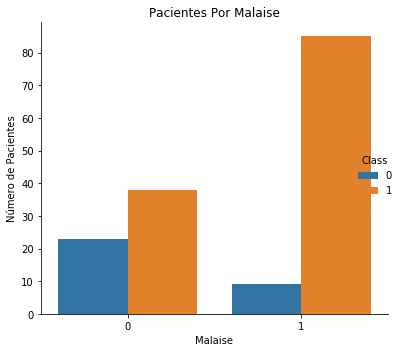

In [63]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Malaise', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Malaise')
plt.tight_layout()

__Anorexia__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [64]:
# Recategorizar dados
dados_hepatite['Anorexia'] = dados_hepatite['Anorexia'].replace('1', '0')
dados_hepatite['Anorexia'] = dados_hepatite['Anorexia'].replace('2', '1')

In [65]:
# Visualizar missing
dados_hepatite['Anorexia'].isnull().sum()

1

In [66]:
# Imputação da mediana em relação ao target
dados_hepatite['Anorexia'] = dados_hepatite['Anorexia'].fillna(dados_hepatite['Anorexia'].median())

In [67]:
dados_hepatite['Anorexia'] = dados_hepatite['Anorexia'].astype('int')

In [68]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Anorexia.sum()}\tProp: {dados_hepatite.Anorexia.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Anorexia.sum()}\tProp: {(1-dados_hepatite.Anorexia.mean()):.2f}')

Yes = 1
Freq: 123	Prop: 0.79

No = 0
Freq: 32	Prop: 0.21


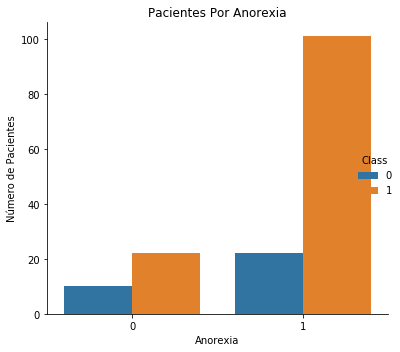

In [69]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Anorexia', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Anorexia')
plt.tight_layout()

__LiverBig__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [70]:
# Recategorizar dados
dados_hepatite['LiverBig'] = dados_hepatite['LiverBig'].replace('1', '0')
dados_hepatite['LiverBig'] = dados_hepatite['LiverBig'].replace('2', '1')

In [71]:
# Visualizar missing
dados_hepatite['LiverBig'].isnull().sum()

10

In [72]:
# Imputação da mediana em relação ao target
dados_hepatite['LiverBig'] = dados_hepatite['LiverBig'].fillna(dados_hepatite['LiverBig'].median())

In [73]:
dados_hepatite['LiverBig'] = dados_hepatite['LiverBig'].astype('int')

In [74]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.LiverBig.sum()}\tProp: {dados_hepatite.LiverBig.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.LiverBig.sum()}\tProp: {(1-dados_hepatite.LiverBig.mean()):.2f}')

Yes = 1
Freq: 130	Prop: 0.84

No = 0
Freq: 25	Prop: 0.16


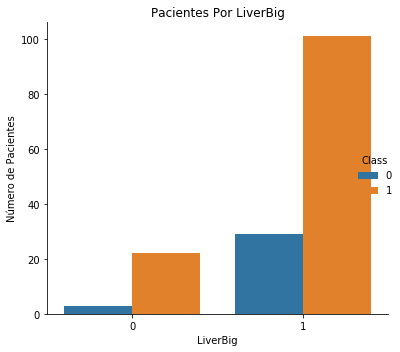

In [75]:
# Visualizar balanceamento
ax = sns.catplot(x = 'LiverBig', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por LiverBig')
plt.tight_layout()

__LiverFirm__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [76]:
# Recategorizar dados
dados_hepatite['LiverFirm'] = dados_hepatite['LiverFirm'].replace('1', '0')
dados_hepatite['LiverFirm'] = dados_hepatite['LiverFirm'].replace('2', '1')

In [77]:
# Visualizar missing
dados_hepatite['LiverFirm'].isnull().sum()

11

In [78]:
# Imputação da mediana em relação ao target
dados_hepatite['LiverFirm'] = dados_hepatite['LiverFirm'].fillna(dados_hepatite['LiverFirm'].median())

In [79]:
dados_hepatite['LiverFirm'] = dados_hepatite['LiverFirm'].astype('int')

In [80]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.LiverFirm.sum()}\tProp: {dados_hepatite.LiverFirm.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.LiverFirm.sum()}\tProp: {(1-dados_hepatite.LiverFirm.mean()):.2f}')

Yes = 1
Freq: 95	Prop: 0.61

No = 0
Freq: 60	Prop: 0.39


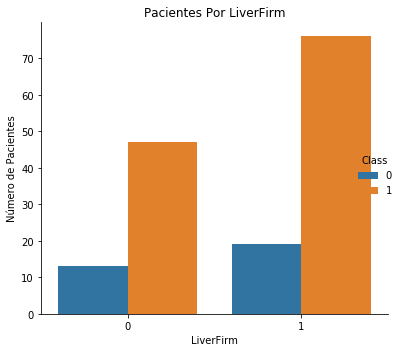

In [81]:
# Visualizar balanceamento
ax = sns.catplot(x = 'LiverFirm', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por LiverFirm')
plt.tight_layout()

__SpleenPalpable__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [82]:
# Recategorizar dados
dados_hepatite['SpleenPalpable'] = dados_hepatite['SpleenPalpable'].replace('1', '0')
dados_hepatite['SpleenPalpable'] = dados_hepatite['SpleenPalpable'].replace('2', '1')

In [83]:
# Visualizar missing
dados_hepatite['SpleenPalpable'].isnull().sum()

5

In [84]:
# Imputação da mediana em relação ao target
dados_hepatite['SpleenPalpable'] = dados_hepatite['SpleenPalpable'].fillna(dados_hepatite['SpleenPalpable'].median())

In [85]:
dados_hepatite['SpleenPalpable'] = dados_hepatite['SpleenPalpable'].astype('int')

In [86]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.SpleenPalpable.sum()}\tProp: {dados_hepatite.SpleenPalpable.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.SpleenPalpable.sum()}\tProp: {(1-dados_hepatite.SpleenPalpable.mean()):.2f}')

Yes = 1
Freq: 125	Prop: 0.81

No = 0
Freq: 30	Prop: 0.19


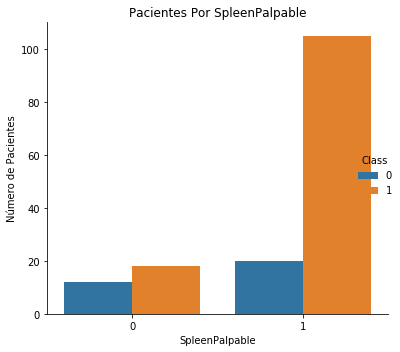

In [87]:
# Visualizar balanceamento
ax = sns.catplot(x = 'SpleenPalpable', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por SpleenPalpable')
plt.tight_layout()

__Spiders__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [88]:
# Recategorizar dados
dados_hepatite['Spiders'] = dados_hepatite['Spiders'].replace('1', '0')
dados_hepatite['Spiders'] = dados_hepatite['Spiders'].replace('2', '1')

In [89]:
# Visualizar missing
dados_hepatite['Spiders'].isnull().sum()

5

In [90]:
# Imputação da mediana em relação ao target
dados_hepatite['Spiders'] = dados_hepatite['Spiders'].fillna(dados_hepatite['Spiders'].median())

In [91]:
dados_hepatite['Spiders'] = dados_hepatite['Spiders'].astype('int')

In [92]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Spiders.sum()}\tProp: {dados_hepatite.Spiders.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Spiders.sum()}\tProp: {(1-dados_hepatite.Spiders.mean()):.2f}')

Yes = 1
Freq: 104	Prop: 0.67

No = 0
Freq: 51	Prop: 0.33


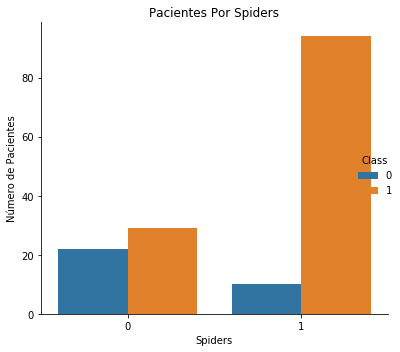

In [93]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Spiders', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Spiders')
plt.tight_layout()

__Ascites__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [94]:
# Recategorizar dados
dados_hepatite['Ascites'] = dados_hepatite['Ascites'].replace('1', '0')
dados_hepatite['Ascites'] = dados_hepatite['Ascites'].replace('2', '1')

In [95]:
# Visualizar missing
dados_hepatite['Ascites'].isnull().sum()

5

In [96]:
# Imputação da mediana em relação ao target
dados_hepatite['Ascites'] = dados_hepatite['Ascites'].fillna(dados_hepatite['Ascites'].median())

In [97]:
dados_hepatite['Ascites'] = dados_hepatite['Ascites'].astype('int')

In [98]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Ascites.sum()}\tProp: {dados_hepatite.Ascites.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Ascites.sum()}\tProp: {(1-dados_hepatite.Ascites.mean()):.2f}')

Yes = 1
Freq: 135	Prop: 0.87

No = 0
Freq: 20	Prop: 0.13


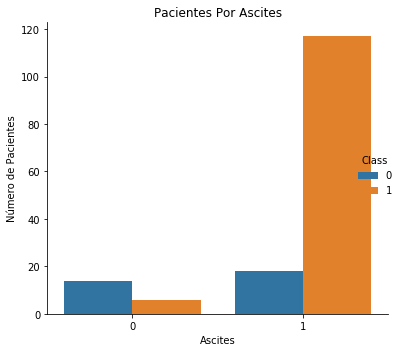

In [99]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Ascites', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Ascites')
plt.tight_layout()

__Varices__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [100]:
# Recategorizar dados
dados_hepatite['Varices'] = dados_hepatite['Varices'].replace('1', '0')
dados_hepatite['Varices'] = dados_hepatite['Varices'].replace('2', '1')

In [101]:
# Visualizar missing
dados_hepatite['Varices'].isnull().sum()

5

In [102]:
# Imputação da mediana em relação ao target
dados_hepatite['Varices'] = dados_hepatite['Varices'].fillna(dados_hepatite['Varices'].median())

In [103]:
dados_hepatite['Varices'] = dados_hepatite['Varices'].astype('int')

In [104]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Varices.sum()}\tProp: {dados_hepatite.Varices.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Varices.sum()}\tProp: {(1-dados_hepatite.Varices.mean()):.2f}')

Yes = 1
Freq: 137	Prop: 0.88

No = 0
Freq: 18	Prop: 0.12


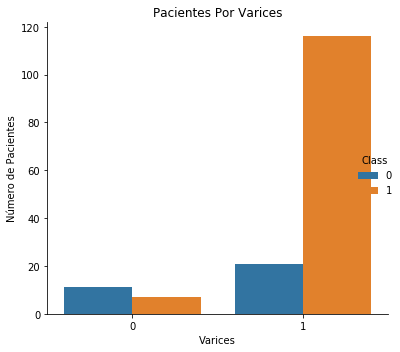

In [105]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Varices', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Varices')
plt.tight_layout()

__Histology__

Transformando 

* No: 1 = 0
* Yes: 2 = 1

In [106]:
# Recategorizar dados
dados_hepatite['Histology'] = dados_hepatite['Histology'].replace(1, 0)
dados_hepatite['Histology'] = dados_hepatite['Histology'].replace(2, 1)

In [107]:
# Visualizar missing
dados_hepatite['Histology'].isnull().sum()

0

In [108]:
print('Yes = 1')
print(f'Freq: {dados_hepatite.Histology.sum()}\tProp: {dados_hepatite.Histology.mean():.2f}')
print('\nNo = 0')
print(f'Freq: {dados_hepatite.shape[0] - dados_hepatite.Histology.sum()}\tProp: {(1-dados_hepatite.Histology.mean()):.2f}')

Yes = 1
Freq: 70	Prop: 0.45

No = 0
Freq: 85	Prop: 0.55


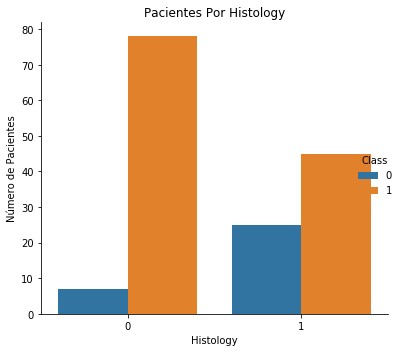

In [109]:
# Visualizar balanceamento
ax = sns.catplot(x = 'Histology', hue = 'Class', data = dados_hepatite, kind = 'count')
ax.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Histology')
plt.tight_layout()

Confirmar limpeza de dados

In [110]:
# Visualizar as primeiras linhas
dados_hepatite.head()

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,1.0,85.0,18.0,4.0,66.0,0
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.9,135.0,42.0,3.5,66.0,0
2,1,78,0,1,1,0,1,1,1,1,1,1,1,1,0.7,96.0,32.0,4.0,66.0,0
3,1,31,0,1,0,1,1,1,1,1,1,1,1,1,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1,1,1,1,1,1,1,1,1,1,1,1.0,85.0,200.0,4.0,66.0,0


In [111]:
# Porcentagem de valores missing
1-(dados_hepatite.count() / dados_hepatite.shape[0]).round(2)

Class             0.0
Age               0.0
Gender            0.0
Steroid           0.0
Antivirals        0.0
Fatigue           0.0
Malaise           0.0
Anorexia          0.0
LiverBig          0.0
LiverFirm         0.0
SpleenPalpable    0.0
Spiders           0.0
Ascites           0.0
Varices           0.0
Bilirubin         0.0
AlkPhosphate      0.0
SGOT              0.0
Albumin           0.0
Protime           0.0
Histology         0.0
dtype: float64

Explorar algumas correlações

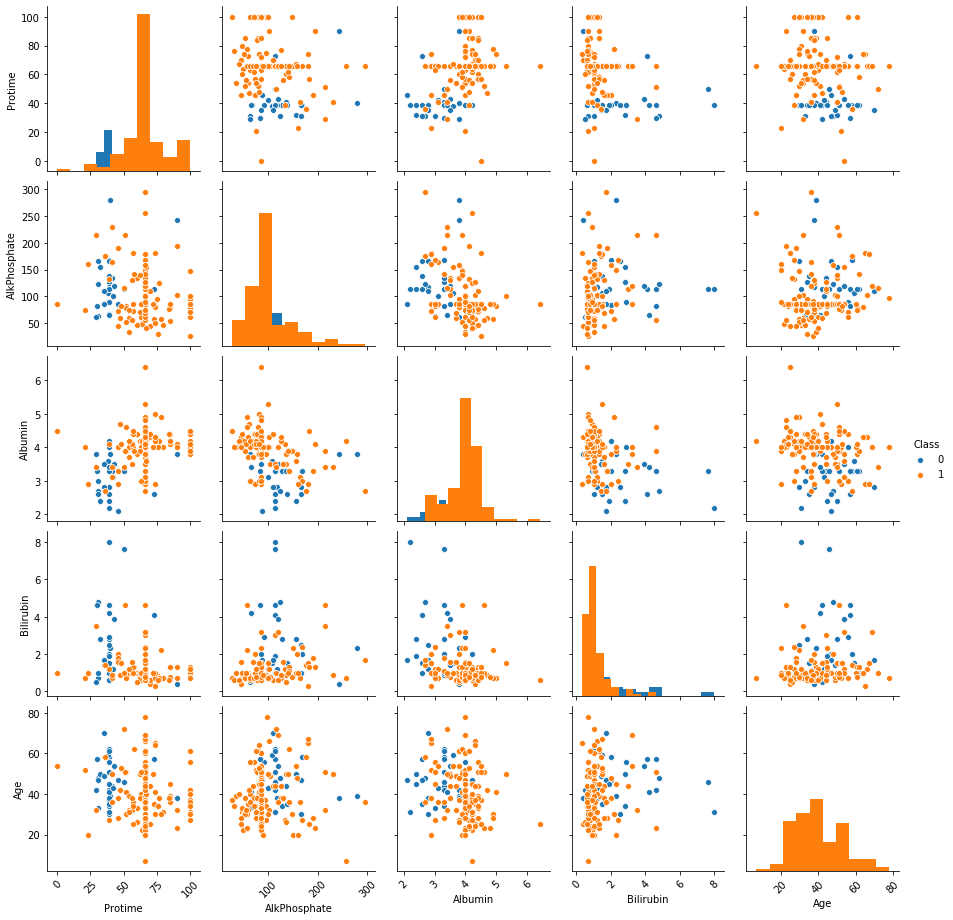

In [112]:
# Analisando a relação entre algumas variáveis
cols = ['Protime','AlkPhosphate', 'Albumin', 'Bilirubin','Age','Class']
g = sns.pairplot(dados_hepatite[cols], diag_kind = "hist", hue = 'Class')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

## Preparação dos Dados Para Modelagem

In [113]:
# Gerando X e y
X = dados_hepatite.drop(['Class'], axis=1)
y = dados_hepatite.Class

In [114]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 23)

In [115]:
X_teste.head()

,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
81,36,0,1,1,1,1,1,1,1,1,1,1,1,0.7,62.0,224.0,4.2,100.0,0
88,38,0,0,1,0,0,0,1,0,1,0,0,0,1.2,118.0,16.0,2.8,39.0,1
113,45,0,0,1,0,1,1,1,0,0,1,1,1,1.2,81.0,65.0,3.0,66.0,0
44,34,0,1,1,1,1,1,1,1,1,1,1,1,1.0,85.0,86.0,4.0,66.0,0
67,57,0,1,1,0,0,0,1,1,1,0,0,1,4.1,113.5,48.0,2.6,73.0,0


In [116]:
# Cria um classiifcador de Regressão logística
cls_v1 = LogisticRegression()

In [117]:
# Treina o classificador e contrói o modelo
modelo_v1 = cls_v1.fit(X_treino, y_treino)

In [118]:
# Fazendo previsões com os dados de teste
y_pred_class = modelo_v1.predict(X_teste)

In [119]:
# Calculando a acurácia 0.5
print(metrics.accuracy_score(y_teste, y_pred_class))

0.8461538461538461


In [120]:
# Calculado a Matriz de Confusão
conf = metrics.confusion_matrix(y_teste, y_pred_class)
print(conf)

[[ 2  5]
 [ 1 31]]


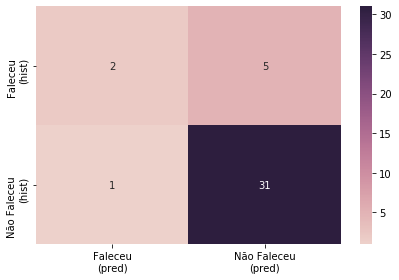

In [121]:
# Criando a Matrix de Confusão de forma visual
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(
    conf, 
    cmap = cmap, 
    xticklabels = ['Faleceu\n(pred)','Não Faleceu\n(pred)'], 
    yticklabels = ['Faleceu\n(hist)','Não Faleceu\n(hist)'], 
    annot = True
)
plt.tight_layout()

In [122]:
# Prevendo as probabilidades
predict_prob = modelo_v1.predict_proba(X_teste)

In [123]:
# Visualizar as 5 primeiras
predict_prob[:5]

array([[0.00216021, 0.99783979],
       [0.39510419, 0.60489581],
       [0.11447685, 0.88552315],
       [0.01558404, 0.98441596],
       [0.39279262, 0.60720738]])

In [124]:
# Preparação de variáveis para visualização gráfica
y_true = np.array(y_teste)
fpr, tpr, thresholds = roc_curve(y_true, predict_prob[:,1])

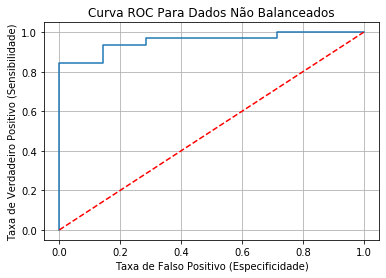

In [125]:
# Curva ROC
plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.title('Curva ROC Para Dados Não Balanceados')
plt.xlabel('Taxa de Falso Positivo (Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.plot([0,1],[0,1],'r--')
plt.grid(True)

In [126]:
# Métrica AUC
roc_auc = metrics.auc(fpr, tpr)
print(f'Area Under The ROC Curve (AUC: {roc_auc:.3f})')

Area Under The ROC Curve (AUC: 0.955)


## Problema - Classes Desbalanceadas

In [127]:
# Treinando o modelo com dados balanceados
cls_v2 = LogisticRegression(class_weight='balanced')
modelo_v2 = cls_v2.fit(X_treino, y_treino)

In [128]:
# Previsões
y_pred_class = modelo_v2.predict(X_teste)

In [129]:
# Criando a Matrix de Confusão
conf = metrics.confusion_matrix(y_teste, y_pred_class)
print(conf)

[[ 7  0]
 [ 2 30]]


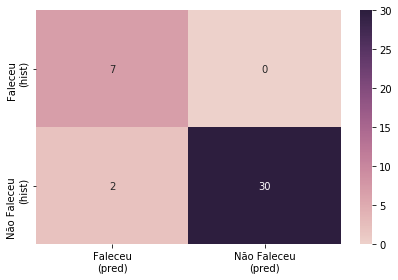

In [130]:
# Criando a Matrix de Confusão de forma visual
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(
    conf, 
    cmap = cmap, 
    xticklabels = ['Faleceu\n(pred)','Não Faleceu\n(pred)'], 
    yticklabels = ['Faleceu\n(hist)','Não Faleceu\n(hist)'], 
    annot = True
)
plt.tight_layout()

In [131]:
predict_prob = modelo_v2.predict_proba(X_teste)
fpr, tpr, thresholds = roc_curve(y_teste, predict_prob[:,1])

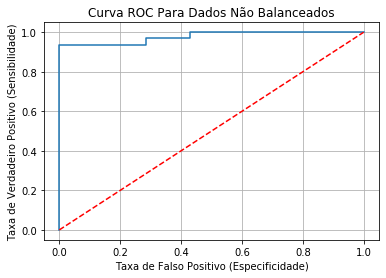

In [132]:
# Curva ROC
plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.title('Curva ROC Para Dados Não Balanceados')
plt.xlabel('Taxa de Falso Positivo (Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.plot([0,1],[0,1],'r--')
plt.grid(True)

In [133]:
# Métrica AUC
roc_auc = metrics.auc(fpr, tpr)
print(f'Area Under The ROC Curve (AUC: {roc_auc:.3f})')

Area Under The ROC Curve (AUC: 0.978)


## Fazendo Previsões com Novos Dados

In [134]:
# Novos dados
novo_paciente = np.array([34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,62.0,214.0,4.2,100.0,0])

# Reshape do array
novo_paciente_reshaped = novo_paciente.reshape(1, -1)

In [135]:
# Prevendo as probabilidades para cada classe
modelo_v2.predict_proba(novo_paciente_reshaped)

array([[0.00420857, 0.99579143]])

In [136]:
# Prevendo a classe
modelo_v2.predict(novo_paciente_reshaped)

array([1])

Ao que parece, esse paciente não irá a óbito.

---